In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [8]:
'''
A class representing a die
'''
class Dice:
    
    # Consutruct an n-sideded die that is by default fairly weighted.
    def __init__(self, numSides, probs=None):
        # Set number of sides:
        self.numSides = numSides
        # Set probability of getting each side. 
        # This is represented as a numpy array where the index is the 
        # side and the value is the probability. If no array is provided
        # to the constructor, then the probability is distributed evenly for all outcomes
        if probs==None:
            self.probs = np.array([1/numSides]*numSides)
        else:
            self.probs = probs
            # Normalize just in case and to better handle rounding errors:
        self.probs /= self.probs.sum()
        # Get bins for determining outcomes by taking the cummulative sum of the probability distribution vector
        self.bins = self.probs.cumsum()
        
    # Define string representation of the object.
    def __repr__(self):
        rep = "Dice Object\n"
        rep += "Num Sides = " + str(self.numSides) + "\n"
        rep += "Probabilities: " + str({idx + 1 : val for idx, val in enumerate(self.probs.tolist())})
        return rep
        
    # Simulate n rolls:
    def roll(self, nTimes=1):
        rolls = []
        for i in range(nTimes):
            rollprob = random.random()
            rolls.append(np.argmax(self.bins>rollprob)+1)
        return np.array(rolls)
    
    

In [9]:
d = Dice(6)

In [10]:
d

Dice Object
Num Sides = 6
Probabilities: {1: 0.16666666666666669, 2: 0.16666666666666669, 3: 0.16666666666666669, 4: 0.16666666666666669, 5: 0.16666666666666669, 6: 0.16666666666666669}

In [11]:
d.roll(10)

array([5, 4, 2, 5, 1, 3, 6, 4, 6, 2])

In [12]:
'''
A class representing a die
'''
class Dice:
    
    # Consutruct an n-sideded die that is by default fairly weighted.
    def __init__(self, numSides, probs=None):
        # Set number of sides:
        self.numSides = numSides
        # Set probability of getting each side. 
        # This is represented as a numpy array where the index is the 
        # side and the value is the probability. If no array is provided
        # to the constructor, then the probability is distributed evenly for all outcomes
        if probs==None:
            self.probs = np.array([1/numSides]*numSides)
        else:
            self.probs = probs
            # Normalize just in case and to better handle rounding errors:
        self.probs /= self.probs.sum()
        # Get bins for determining outcomes by taking the cummulative sum of the probability distribution vector
        self.bins = self.probs.cumsum()
        
    # Define string representation of the object.
    def __repr__(self):
        rep = "Dice Object\n"
        rep += "Num Sides = " + str(self.numSides) + "\n"
        rep += "Probabilities: " + str({idx + 1 : val for idx, val in enumerate(self.probs.tolist())})
        return rep
        
    # Simulate n rolls:
    def roll(self, nTimes=1):
        rolls = []
        for i in range(nTimes):
            rollprob = random.random()
            rolls.append(np.argmax(bins>rollprob)+1)
        return np.array(rolls)

In [13]:
class Rose_6_Die(Dice):
    
    def __init__(self, kvals=[1]*9, n=200, alpha=0.4, color1='xkcd:deep rose',color2='xkcd:charcoal', color3='xkcd:jade', backcolor='xkcd:pale'):
        super().__init__(6)
        self.kvals = kvals
        self.n = n
        self.alpha = alpha
        self.color1 = color1
        self.color2 = color2
        self.color3 = color3
        self.backcolor = backcolor
        self.displayDict = {1:[4],
                           2:[0,8],
                           3:[2,4,6],
                           4:[0,2,6,8],
                           5:[0,2,4,6,8],
                           6:[0,2,3,5,6,8]}
        
    def roll(self):
        return super().roll(1)[0] 
    
    def display_face(self, face):
        # Create a figure:
        plt.figure(figsize=(20, 20),facecolor=self.backcolor)
        for i, a in enumerate(self.kvals):
            # for each subplot load in the ith frame
            ax = plt.subplot(3, 3, i+1)
            x = np.linspace(0, 100 * np.pi, self.n)
            ax.set_aspect(1)
            plt.axis('off')
            k = self.kvals[i]
            
            if i in self.displayDict[face]:
                if i in [0, 2, 6, 8]:
                    ax.plot(np.cos(k*x)*np.cos(x), np.cos(k*x)*np.sin(x), self.color1, alpha=self.alpha)
                elif i in [1, 3, 5, 7]:
                    ax.plot(np.cos(k*x)*np.cos(x), np.cos(k*x)*np.sin(x), self.color2, alpha=self.alpha)
                else:
                    ax.plot(np.cos(k*x)*np.cos(x), np.cos(k*x)*np.sin(x), self.color3, alpha=self.alpha)
            else:
                ax.plot(np.zeros_like(x), np.zeros_like(x), self.backcolor, alpha=self.alpha)
        plt.show()

In [14]:
r = Rose_6_Die(kvals=[0.8]*9, color1='xkcd:ecru',color2='xkcd:ecru', color3='xkcd:midnight blue', backcolor='xkcd:burnt red')

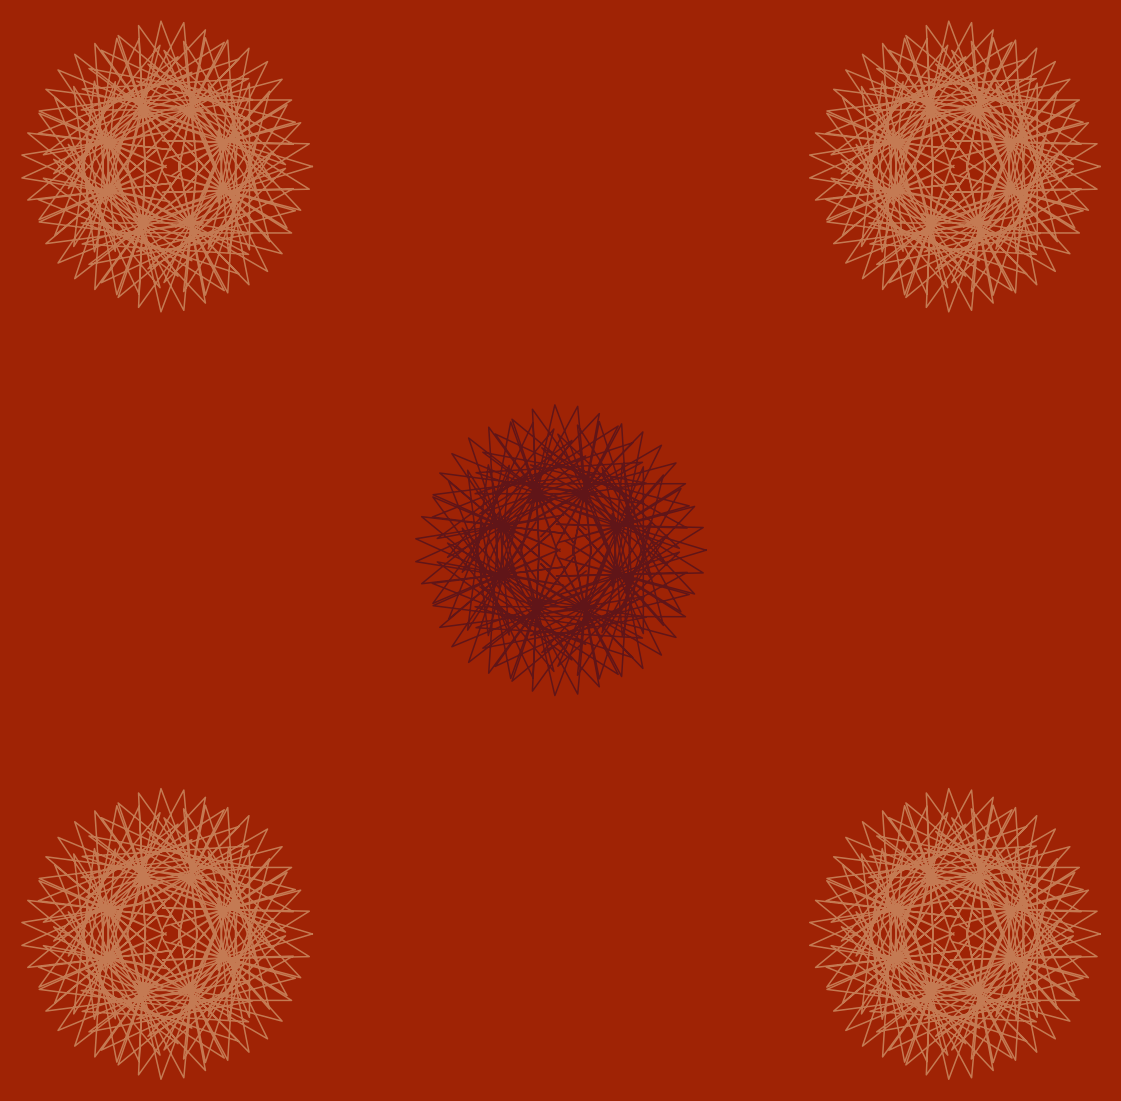

In [15]:
r.display_face(5)